In [ ]:
#http://people.bu.edu/andasari/courses/numericalpython/Week11Lecture19/PythonFiles/adi_2d_oop.py

In [71]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [92]:
class ADImethod:
    
    def __init__(self, M, maxt, D):
        self.M = M
        self.x0 = 0
        self.xf = 1
        self.y0 = 0
        self.yf = 1
        self.maxt = maxt
        self.dt = 0.01
        self.D = D
        self.h = 1/self.M
        self.r = self.D*self.dt/(2*self.h**2)
        self.generateGrid()
        self.lhsMatrixA()
        self.rhsMatrixA()
        self.heatsourceQ()

            
    def generateGrid(self):
        self.X, self.Y = np.meshgrid(np.linspace(self.x0, self.xf, self.M), np.linspace(self.y0, self.yf,self. M))
        ic01 = np.logical_and(self.X >= 0, self.X <= 1)
        ic02 = np.logical_and(self.Y >= 0, self.Y <= 1)
        ic0 = np.multiply(ic01, ic02)
        self.U = ic0*37
        
    def heatsourceQ(self):  #heating
        self.Q = np.zeros((self.M, self.M))
        r2 = 0.04
        for i in range(self.M):
            for j in range(self.M):
                p2 = (i*self.h-1/2)**2 + (j*self.h-1/2)**2
                if p2 < r2:
                    self.Q[i,j] = 5*np.exp(-100*p2)

        
    
    def lhsMatrixA(self):
        maindiag = (1+2*self.r)*np.ones((1, self.M))
        offdiag = -self.r*np.ones((1, self.M-1))
        a = maindiag.shape[1]
        diagonals = [maindiag, offdiag, offdiag]
        Lx = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
        Ix = sparse.identity(self.M).toarray()
        self.A = sparse.kron(Ix, Lx).toarray()
        
        pos1 = np.arange(0,self.M**2,self.M)
        
        for i in range(len(pos1)):
            self.A[pos1[i], pos1[i]] = 1 + self.r
            
        pos2 = np.arange(self.M-1, self.M**2, self.M)
        
        for j in range(len(pos2)):
            self.A[pos2[j], pos2[j]] = 1 + self.r
        plt.imshow(self.A)
        plt.show()   
    
    def rhsMatrixA(self):
        maindiag = (1-self.r)*np.ones((1, self.M))
        offdiag = self.r*np.ones((1, self.M-1))
        a = maindiag.shape[1]
        diagonals = [maindiag, offdiag, offdiag]
        Rx = sparse.diags(diagonals, [0, -1, 1], shape=(a, a)).toarray()
        print(Rx)
        Ix = sparse.identity(self.M).toarray()
        self.A_rhs = sparse.kron(Rx, Ix).toarray()
        
        pos3 = np.arange(self.M, self.M**2-self.M)
        
        for k in range(len(pos3)):
            self.A_rhs[pos3[k], pos3[k]] = 1 - 2*self.r
        plt.imshow(self.A_rhs)
        plt.show()       
        print(self.A_rhs)
    def solve_and_plot(self): # Important bit!!!!!!!!!!!!!!
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        #ax.set_zlim(0, 1)
        tc = 0
        nstep = round(self.maxt/self.h)
        while tc < nstep:
            b1 = np.flipud(self.U).reshape(self.M**2, 1)
            sol = np.linalg.solve(self.A, np.matmul(self.A_rhs, b1))
            self.U = np.flipud(sol).reshape(self.M, self.M)
            
            b2 = np.flipud(self.U).reshape(self.M**2, 1)
            sol = np.linalg.solve(self.A, np.matmul(self.A_rhs, b2))
            self.U = np.flipud(sol).reshape(self.M, self.M)
            self.U=self.U+self.Q*self.dt
            self.U[0,:]=np.ones(self.M)*37
            self.U[-1,:]=np.ones(self.M)*37
            self.U[:,-1]=np.ones(self.M)*37
            self.U[:,0]=np.ones(self.M)*37
            tc += 1
            
        ax.plot_surface(self.X, self.Y, self.U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        plt.tight_layout()
        plt.show()
    

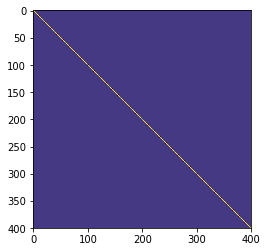

[[0.66666667 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.33333333 0.66666667 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.33333333 0.66666667 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.33333333 0.66666667 0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.    

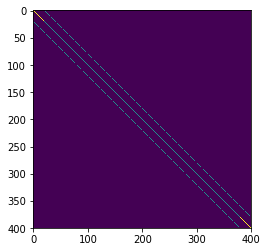

[[0.66666667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66666667 0.         0.        ]
 [0.         0.         0.         ... 0.         0.66666667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.66666667]]


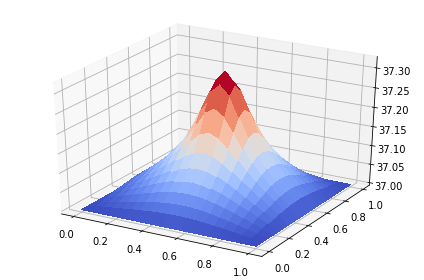

In [93]:
def main():
    simulator = ADImethod(20, 10, 1/6)
    simulator.solve_and_plot()

if __name__ == "__main__":
    main()
    